# 🌼 Dataset Iris e KNN

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

data = load_iris()

X = data.data
y = data.target

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Validação Cruzada
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print(f"Acurácia por fold: {cv_scores}")         
print(f"Acurácia média: {cv_scores.mean()}") 

Acurácia por fold: [0.95833333 0.95833333 0.83333333 1.         0.875     ]
Acurácia média: 0.925


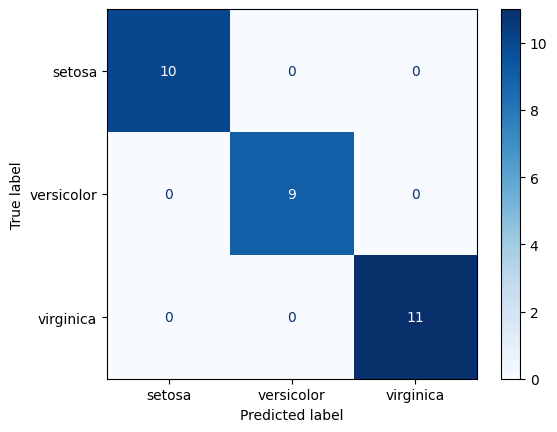

In [10]:
# Treinar no conjunto de treino completo e testar
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues')

In [11]:
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



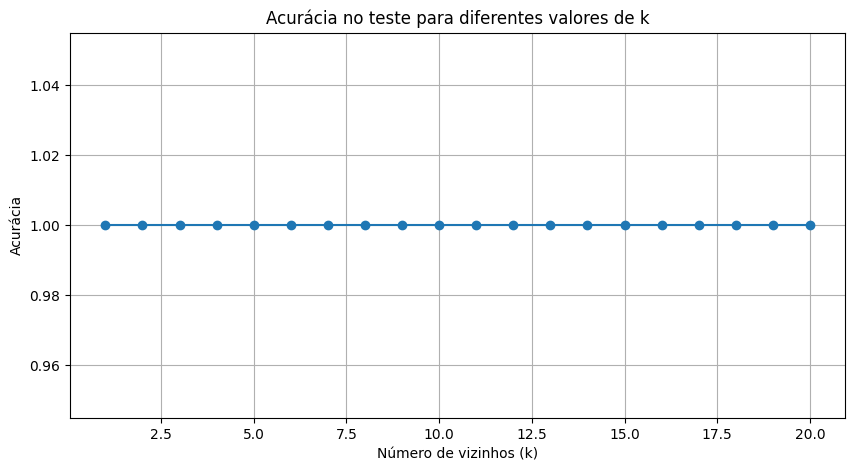

In [12]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    acc = knn.score(X_test_scaled, y_test)
    accuracies.append(acc)

plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title("Acurácia no teste para diferentes valores de k")
plt.xlabel("Número de vizinhos (k)")
plt.ylabel("Acurácia")
plt.grid(True)
plt.show()
